In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Savage World Dice
Savage Worlds uses a dN with Aces: when a max is rolled, reroll and add results. In this notebook `d(N)` will result in a SW dice roll

In [2]:
def d(sides):
    roll = rnd.randint(1, sides)
    if (roll < sides) :
        return roll
    else:
        return roll + d(sides) 
    


## Basic Dice Rolling
What can we expect from a d8 in terms of averages, medians, quartiles, 95th percentile? What about with a wildcard vs no wildcard? The next cell creates a historgram of results for rolling a given die ten thousand times and prints relevant stats. 

Mean: 	 5.1344
Median:	 5.0
Q1:	 3.0
Q3:	 7.0
95% :	 13.0
Max :	 33


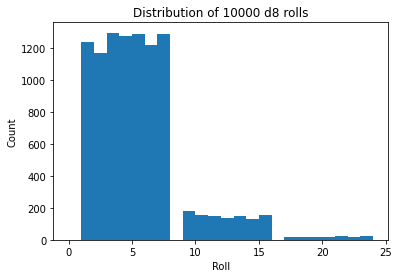

In [18]:
# Without wildcard

sides = 8
N = 10000
data = [d(sides) for i in range(N)]
n, bins, p = plt.hist(data,range(25))
plt.title(f'Distribution of {N} d{sides} rolls')
plt.ylabel('Count')
plt.xlabel('Roll')
print("Mean: \t", np.mean(data))
print("Median:\t", np.percentile(data, 50))
print("Q1:\t", np.percentile(data, 25))
print("Q3:\t", np.percentile(data, 75))
print("95% :\t", np.percentile(data, 95))
print("Max :\t", max(data))

Mean: 	 6.4994
Median:	 5.0
Q1:	 4.0
Q3:	 7.0
95% :	 15.0
Max :	 39


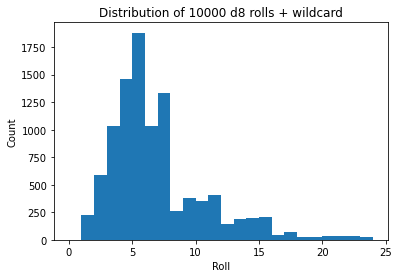

In [19]:
# With wildcard

sides = 8
N = 10000
data = [max(d(6), d(sides)) for i in range(N)]
n, bins, p = plt.hist(data,range(25))
plt.title(f'Distribution of {N} d{sides} rolls + wildcard')
plt.ylabel('Count')
plt.xlabel('Roll')
print("Mean: \t", np.mean(data))
print("Median:\t", np.percentile(data, 50))
print("Q1:\t", np.percentile(data, 25))
print("Q3:\t", np.percentile(data, 75))
print("95% :\t", np.percentile(data, 95))
print("Max :\t", max(data))

In [55]:
sides = [4, 6, 8, 10, 12]
N = 100000
final_data = []
moments = []
for s in sides:
    for wildcard in [False, True]:
        if wildcard == True:
            data = [max(d(6), d(s)) for i in range(N)]
        else:
            data = [d(s) for i in range(N)]
        q2, q1, q3, n95 = np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
        l_mean = np.mean(data)
        l_max = np.max(data)
        print(s, q1, q2, q3, n95, l_mean, l_max)
        moments.append([s, q1, q2, q3, n95, l_mean, l_max])
        final_data.append(data)

4 2.0 3.0 5.0 9.0 3.3468 35
4 3.0 4.0 7.0 11.0 5.30002 46
6 2.0 4.0 5.0 11.0 4.20549 39
6 3.0 5.0 8.0 13.0 5.8086 46
8 3.0 5.0 7.0 13.0 5.1424 41
8 4.0 5.0 7.0 14.0 6.4788 45
10 3.0 5.0 8.0 15.0 6.10495 54
10 4.0 7.0 9.0 16.0 7.23974 59
12 4.0 7.0 9.0 17.0 7.10831 55
12 5.0 7.0 10.0 18.0 8.07348 71


In [54]:
df = pd.DataFrame(final_data)

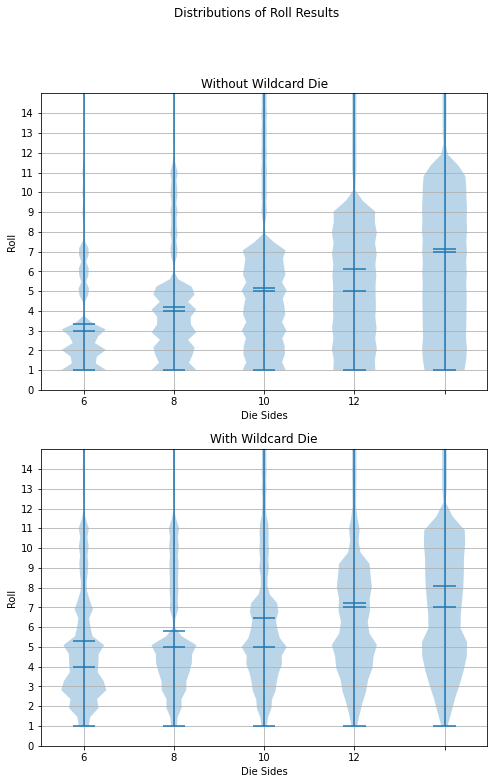

In [60]:
fig, ax = plt.subplots(2,1, figsize=(8,12))
ax[1].set_xticklabels([4, 6, 8, 10, 12])
top = 15
fig.suptitle('Distributions of Roll Results')
titles = [
    'Without Wildcard Die',
    'With Wildcard Die'
]
for a in [0, 1]:
    #ax[a].boxplot(final_data[a::2], showfliers=False, widths=0.1, whis=0)
    ax[a].violinplot(final_data[a::2], showmeans=True, showmedians=True)
    ax[a].set_ylim([0, top])
    ax[a].set_yticks(np.arange(top))
    ax[a].set_xticklabels(sides)
    ax[a].set_xlabel('Die Sides')
    ax[a].set_ylabel('Roll')
    ax[a].set_title(titles[a])
    ax[a].grid()


4 2.0 3.0 5.0 9.0 3.33299
6 2.0 3.0 5.0 11.0 4.18337
8 2.0 5.0 7.0 13.0 5.15451
10 3.0 6.0 8.0 15.0 6.10629
12 3.0 6.0 10.0 17.0 7.08674


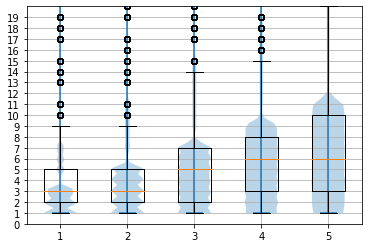

In [6]:
fig, ax = plt.subplots()

sides = [4, 6, 8, 10, 12]
N = 100000
final_data = []
for s in sides:
    for wildcard in [False]:
        if wildcard == True:
            data = [max(d(6), d(s)) for i in range(N)]
        else:
            data = [d(s) for i in range(N)]
        median, q1, q3, n95 = np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
        mean = np.mean(data)
        print(s, q1, median, q3, n95, mean)
        final_data.append(data)
ax.boxplot(final_data)
ax.violinplot(final_data)
ax.set_ylim([0, 20])
ax.set_yticks(np.arange(20))
ax.grid()

10: (5.29075, 5.0, 3.0, 7.0, 11.0)
6: (5.79509, 5.0, 4.0, 8.0, 13.0)
8: (6.48164, 5.0, 4.0, 7.0, 14.0)
10: (7.21847, 6.0, 4.0, 9.0, 16.0)
12: (8.06417, 7.0, 5.0, 10.0, 18.0)


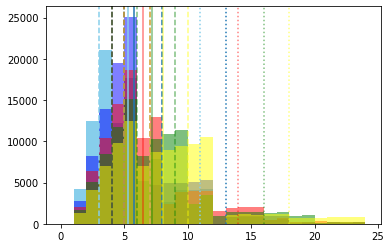

In [39]:
fig, ax = plt.subplots()
lines = ['-', '--', '--', '--', ':']
labels = ["mean", "median", "q1", "q3", "n95"]


data = [max(d(6), d(4)) for i in range(100000)]
n, bins, p = ax.hist(data, range(25),  color="skyblue")
moms = np.mean(data), np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
print('10:', moms)
for xc, l in zip(moms, lines):
    ax.axvline(x=xc, linestyle=l,  c='skyblue')

data = [max(d(6), d(6)) for i in range(100000)]
n, bins, p = ax.hist(data, range(25), alpha = .5, color="blue", lw=1)
moms = np.mean(data), np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
print('6:', moms)
for xc, l in zip(moms, lines):
    ax.axvline(x=xc, linestyle=l)

data = [max(d(6), d(8)) for i in range(100000)]
n, bins, p = ax.hist(data, range(25), alpha = .5, color="red")
moms = np.mean(data), np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
print('8:', moms)
for xc, l in zip(moms, lines):
    ax.axvline(x=xc, linestyle=l, alpha = .5, c='r')

data = [max(d(6), d(10)) for i in range(100000)]
n, bins, p = ax.hist(data, range(25), alpha = .5, color="green")
moms = np.mean(data), np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
print('10:', moms)
for xc, l in zip(moms, lines):
    ax.axvline(x=xc, linestyle=l, alpha = .5, c='green')

data = [max(d(6), d(12)) for i in range(100000)]
n, bins, p = ax.hist(data, range(25), alpha = .5, color="yellow")
moms = np.mean(data), np.percentile(data, 50), np.percentile(data, 25), np.percentile(data, 75), np.percentile(data, 95)
print('12:', moms)
for xc, l in zip(moms, lines):
    ax.axvline(x=xc, linestyle=l, alpha = .5, c='yellow')

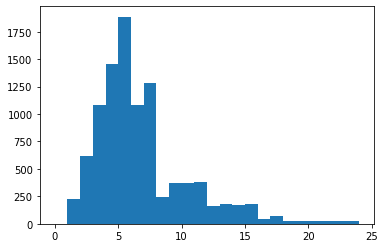

In [31]:
n, bins, p = plt.hist([max(d(6), d(8)) for i in range(10000)],range(25))

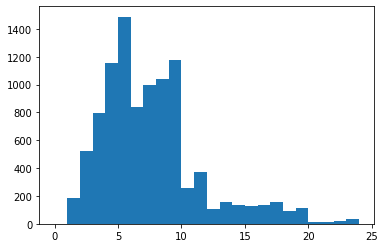

In [32]:
n, bins, p = plt.hist([max(d(6), d(10)) for i in range(10000)],range(25))

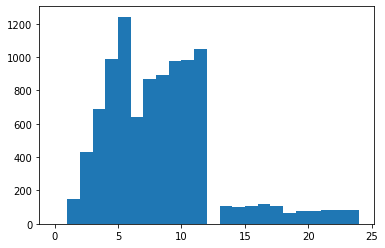

In [33]:
n, bins, p = plt.hist([max(d(6), d(12)) for i in range(10000)],range(25))

In [11]:
import sys
sys.path


In [34]:
import importlib
importlib.reload(character)
from character import Character
c = Character()

NameError: name 'character' is not defined

In [8]:
from character import Character
c = Character("Alice")

In [126]:
c.get_random_hindrances()

({'Yellow': 'M', 'Ugly': 'M'}, 4)

In [89]:
c.add_advancement(2)
print(c.advancement)
c.get_rank()

10


'Veteran'

In [67]:
c.add_item('fork', 1, 'this is an excellent fork and will last ofr many meals')

[1, 'this is an excellent fork and will last ofr many meals']


0

In [39]:
c.print_attributes()
c.add_attribute('Vigor')
c.print_attributes()

{'Agility': 4, 'Smart': 4, 'Spirit': 4, 'Strength': 4, 'Vigor': 4}
{'Agility': 4, 'Smart': 4, 'Spirit': 4, 'Strength': 4, 'Vigor': 6}


In [26]:
c.get_derived()

{'pace': 6, 'parry': 2.0, 'toughness': 5.0}

In [23]:
c.print_skills()
c.add_skill('afagdf')

{'Athletics': 4, 'Common Knowledge': 4, 'Notice': 4, 'Persuasion': 4, 'Stealth': 4, 'Academics': 0, 'Battle': 0, 'Boating': 0, 'Driving': 0, 'Electronics': 0, 'Faith': 0, 'Fighting': 12, 'Focus': 0, 'Gambling': 0, 'Hacking': 0, 'Healing': 0, 'Intimidation': 0, 'Language': 0, 'Occult': 0, 'Performance': 0, 'Piloting': 0, 'Psionics': 0, 'Repair': 0, 'Research': 0, 'Riding': 0, 'Science': 0, 'Shooting': 0, 'Spellcasting': 0, 'Survival': 0, 'Taunt': 0, 'Thievery': 0, 'Weird Science': 0}
'afagdf'


In [27]:
c.skill_incs

0

In [28]:
c.print_skills()

{'Athletics': 4, 'Common Knowledge': 4, 'Notice': 4, 'Persuasion': 4, 'Stealth': 4, 'Academics': 0, 'Battle': 0, 'Boating': 0, 'Driving': 0, 'Electronics': 0, 'Faith': 0, 'Fighting': 0, 'Focus': 0, 'Gambling': 0, 'Hacking': 0, 'Healing': 0, 'Intimidation': 0, 'Language': 0, 'Occult': 0, 'Performance': 0, 'Piloting': 0, 'Psionics': 0, 'Repair': 0, 'Research': 0, 'Riding': 0, 'Science': 0, 'Shooting': 0, 'Spellcasting': 0, 'Survival': 0, 'Taunt': 0, 'Thievery': 0, 'Weird Science': 0}


In [47]:
c.add_hindrance('Clumsy','f')

Only M or m allowed for hindrance levl


In [43]:
c.hindrances

{}

In [46]:
c.hind_pts

4

In [50]:
c.uid

UUID('93041837-0e45-4fbd-b047-d9e1f6a8bdae')

In [96]:
import codenamize as cd
import uuid

In [53]:
a = uuid.uuid4()

In [59]:
int(a)

80337208374443332577468342504245486984

In [61]:
cd.codenamize(int(a),2)

'lopsided-protective-rush'

In [58]:
type(a)

uuid.UUID

In [62]:
c.derived

{'pace': 6, 'parry': 2.0, 'toughness': 4.0}

In [69]:
4//4

1

In [90]:
import pickle

In [95]:
out = open('c.bin', 'wb')
pickle.dump(c, out)

In [114]:
h = c.get_all_hindrances()
[k for k,v in h.items() if v.find('M') != -1]

['Arrogant',
 'Bad Eyes',
 'Bad Luck',
 'Blind',
 'Bloodthirsty',
 'Clueless',
 'Clumsy',
 'Code of Honor',
 'Curious',
 'Delusional',
 'Driven',
 'Elderly',
 'Enemy',
 'Greedy',
 'Habit',
 'Hard of Hearing',
 'Heroic',
 'Impulsive',
 'Jealous',
 'Mute',
 'Obligation',
 'One Arm',
 'One Eye',
 'Outsider',
 'Overconfident',
 'Pacifist',
 'Phobia',
 'Ruthless',
 'Secret',
 'Shamed',
 'Slow',
 'Suspicious',
 'Thin Skinned',
 'Tongue-Tied',
 'Ugly',
 'Vengeful',
 'Vow',
 'Wanted',
 'Yellow',
 'Young',
 'Alien Form',
 'Allergy',
 'Dependency',
 'Dependent',
 'Gimmick',
 'Monologuer',
 'Mania',
 'Power Negation',
 'Terminally Ill',
 'Weakness',
 'Bad Filters',
 'Giri',
 'Magnet',
 'Nano-Infection',
 'Unplugged']

In [13]:
from character import Character
xan = Character("Xander")

In [3]:
attr_list = ['Agility', 'Agility', 'Agility', 'Smarts', 'Smarts', 'Smarts', 'Vigor']
for a in attr_list:
    xan.add_attribute(a)
xan.attributes

{'Agility': 10, 'Smarts': 10, 'Spirit': 4, 'Strength': 4, 'Vigor': 6}

In [4]:
skill_list = ['Notice', 'Electronics', 'Electronics', 'Electronics', 'Piloting', 'Piloting', 'Piloting', 'Piloting', 'Piloting', 'Hacking', 'Hacking', 'Shooting']
for s in skill_list:
    xan.add_skill(s)
{k:v for k, v in xan.skills.items() if v != 0}

{'Athletics': 4,
 'Common Knowledge': 4,
 'Notice': 6,
 'Persuasion': 4,
 'Stealth': 4,
 'Electronics': 8,
 'Hacking': 6,
 'Piloting': 12,
 'Shooting': 4}

In [8]:
xan.add_hindrance('Overconfident')
xan.add_hindrance('Impulsive')
xan.hindrances

{'Overconfident': 'M', 'Impulsive': 'M'}

In [24]:
xan.add_edge('Ace')

In [25]:
xan.edges

{'Ace': 'Novice'}